## Lab 2: Text Classification

Note: For this lab exercise, it is recommended that you use [Google colab](https://colab.research.google.com/) to avoid issues concerning the deep learning module dependencies on your local system.

For questions contact:

Yash Pawar

email ID: yash.pawar@dsv.su.se

## 1. Introduction


In this lab exercise, we will perform classification of text into predefined classes using Machine Learning. In particular, we will be classifying the text from [BBC](http://mlg.ucd.ie/datasets/bbc.html) dataset consisting of 5 different classes. 

In [1]:
import pandas as pd
import os
import numpy as np

## Suppress warnings

import warnings
warnings.filterwarnings("ignore")

### 2. Import Dataset


In [2]:
# Note: The filepath has been specified considerning that the notebook is run using google colab.

bbc = pd.read_csv(filepath_or_buffer='/content/bbc_text.csv', delimiter = ',')
#bbc = pd.read_csv("bbc_text.csv", delimiter = ',')
bbc.head()
#bbc.set_axis(['sno','category','text'], axis=1, inplace=True)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
# from sklearn.model_selection import train_test_split

# ## To do: Replace the ??? with code to split the dataset into train and test set
# training_bbc, test_bbc, y_training_bbc, y_test_bbc = train_test_split(bbc.text, bbc.category, test_size=0.33, random_state=0)
# #training_bbc, test_bbc = nlp.load_dataset('bbc_text', split=['train', 'test'])
bbc.category.value_counts()
#bbc['category_num'] = bbc.category.map({'sport':0, 'business':1, 'politics':2, 'tech':3, 'entertainment':4})
bbc.head




<bound method NDFrame.head of            category                                               text
0              tech  tv future in the hands of viewers with home th...
1          business  worldcom boss  left books alone  former worldc...
2             sport  tigers wary of farrell  gamble  leicester say ...
3             sport  yeading face newcastle in fa cup premiership s...
4     entertainment  ocean s twelve raids box office ocean s twelve...
...             ...                                                ...
2220       business  cars pull down us retail figures us retail sal...
2221       politics  kilroy unveils immigration policy ex-chatshow ...
2222  entertainment  rem announce new glasgow concert us band rem h...
2223       politics  how political squabbles snowball it s become c...
2224          sport  souness delight at euro progress boss graeme s...

[2225 rows x 2 columns]>

In [41]:
X = bbc.text
#y = bbc.category_num
y = bbc.category
# print(X.shape)
# print(y.shape)

from sklearn.model_selection import train_test_split

## To do: Replace the ??? with code to split the dataset into train and test set
#training_bbc, test_bbc, y_training_bbc, y_test_bbc = train_test_split(X,y, test_size=0.2, random_state=43)
training_bbc, test_bbc = train_test_split(bbc, test_size=0.33, random_state=50)
# print(training_bbc.head(5))
# print(test_bbc.head(5))
# print(y_training_bbc.head(5))
# print(y_test_bbc.head(5))

training_bbc, test_bbc

(           category                                               text
 793            tech  doors open at biggest gadget fair thousands of...
 155   entertainment  the comic book genius of stan lee stan lee  th...
 942           sport  butler strikes gold in spain britain s kathy b...
 1293  entertainment  spector facing more legal action music produce...
 139        business  rich grab half colombia poor fund half of the ...
 ...             ...                                                ...
 2014          sport  desailly backs blues revenge trip marcel desai...
 2157          sport  woodward eyes brennan for lions toulouse s for...
 1931          sport  venus stunned by farina elia venus williams su...
 1504  entertainment  global release for japan hit film oscar-winnin...
 1712       politics  mps demand  budget leak  answers ministers hav...
 
 [1490 rows x 2 columns],
            category                                               text
 836        business  tsunami cost h

### 3. Visualization

Your task here is to get an understanding of distribution of different classes in the data by visualization and compare them.

You are expected to generate two plots, on for each training and test dataset.

You can refer to the [Bar plots tutorial](https://pythonguides.com/matplotlib-plot-bar-chart/) to know more.

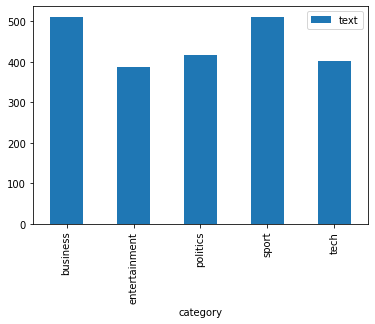

In [42]:
import matplotlib.pyplot as plt

# To do: add the code below to plot the Distribution of classes in both the datasets.
# fig, ax = plt.subplots(1, 2)

# plt.tight_layout()
# ax[0].boxplot(test_bbc)
# ax[0].set_title("TrainingBBC")

# ax[1].set_title('test_bbc')
# ax[1].boxplot(training_bbc)

bbc.groupby('category').count().plot.bar(ylim=0)
plt.show()


### 5. Classification using Naive Bayes

For training and validation, we will use a [Multinomial Naive Bayes classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html). Here, you are expected to:

1. Vectorize the text from the training set.
2. Train the classifier
3. Evaluate the classifier using the test set. 

Tip: You can use [sklearn's pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) functionality to perform steps 1 and 2. 

Tip: You can use [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to print the results of evaluation.


In [45]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


# Train and evaluate a Multinomial Naive Bayes classifier
# To do: Add the code below to build a pipeline for the classifier.


#cv = CountVectorizer()
#cv_model = cv.fit_transform(training_bbc)
#training_bbc_x = cv.fit_transform(training_bbc)
#test_bbc_x = cv.transform(test_bbc)



#mnb = MultinomialNB()
#%time mnb.fit(cv_model, training_bbc)
#%time mnb.fit(cv_model, training_bbc[:1])
#y_predition = mnb.predict(cv_model)

text_clf = Pipeline([
 ('cv', CountVectorizer(stop_words='english')), ('predictor', MultinomialNB())
])

text_clf.fit(training_bbc['text'],training_bbc['category'])
#text_clf.fit(X,y)
y_predition = text_clf.predict(test_bbc)
y_predition = text_clf.predict(test_bbc['text'])
# svc = SVC
# text_clf = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])


#print(classification_report(y_test_bbc[:], y_predition))

print(classification_report(test_bbc['category'], y_predition))


               precision    recall  f1-score   support

     business       0.98      0.96      0.97       182
entertainment       0.99      0.95      0.97       143
     politics       0.94      0.98      0.96       133
        sport       0.99      0.99      0.99       157
         tech       0.94      0.98      0.96       120

     accuracy                           0.97       735
    macro avg       0.97      0.97      0.97       735
 weighted avg       0.97      0.97      0.97       735



### 6. Baseline Classifier

You can compare the performance of your Machine Learning model with a simple baseline classifier. One possibility could be to use a classifier that generates predictions by respecting the training set’s class distribution. You can consider using [Dummy classifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) from scikit learn.



In [46]:
from sklearn.dummy import DummyClassifier

# Evaluate the random baseline
baseline = DummyClassifier(strategy="stratified")

# To do: Add the code below to train the baseline classifier and evaluate it.

#use f1 score in case of uneven distribution or unbalanced dataset
baseline.fit(training_bbc['text'], training_bbc['category'])
#baseline.fit(X,y)
by_predition = baseline.predict(test_bbc[:])
by_predition = baseline.predict(test_bbc['text'])
#baseline.score(X, y)

#print(classification_report(y_test_bbc, y_predition))
print(classification_report(test_bbc['category'], by_predition))

               precision    recall  f1-score   support

     business       0.24      0.19      0.21       182
entertainment       0.17      0.15      0.16       143
     politics       0.21      0.22      0.21       133
        sport       0.24      0.27      0.26       157
         tech       0.14      0.17      0.15       120

     accuracy                           0.20       735
    macro avg       0.20      0.20      0.20       735
 weighted avg       0.20      0.20      0.20       735



Is the result from the baseline classifier justified?

### 6. Grid Search

So far, you have trained the vectorizer and the classifer using their default parameters. However, in practical settings, one needs to optimize the parameters of the model to maximize the performance. 

Here, you are asked to find the optimal parameters for the pipelines that you have created above using a 5 fold cross validation. The choice of hyperparameters for optimization are:

1. Bi-grams vs uni-grams vs tri-grams from [Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). 
2. Additive smoothing  for the Multinomial naive bayes classifier $\alpha$ = {1, 0.1}
3. Tokenized vs non-tokenized text (For tokenization, you can use the function 'preprocess' that is given below as a parameter for the vectorizer.)


You can refer to the [Grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) documentation from the scikit-learn library.

Finally, print the parameters from the grid search that give the best performance. 

In [47]:

# Function preprocess can be used as a tokenizer.
#from spacy.lang.en import English
import spacy
#import en_core_web_sm
#from spacy.lang.en import English
#nlp = en_core_web_sm.load()
nlp = spacy.load('en_core_web_sm', disable=["tagger", "parser", "ner"])
#nlp = spacy.load('en', disable=["tagger", "parser", "ner"])
def preprocess(text):
    doc = nlp(text)
 
    final_key=[]
    for token in doc:
        if token.is_stop==False and token.lemma_.isalpha():
            
            final_key.append(token.lemma_)
        
    return final_key

In [48]:
from sklearn.model_selection import GridSearchCV

# To do: Replace the ??? in the code and implement the grid search
# Note: Take a look at how you an specify the parameters for grid search from an example of n-grams. Similarly, you can specify the other remaining parameters.
params = {'cv__ngram_range':[(1,1), (1,2), (1,3)],
           'cv__tokenizer' :[None, preprocess],
    'predictor__alpha': [1, 0.1]
          }

grid_search = GridSearchCV(text_clf, params)
grid_search.fit(training_bbc['text'], training_bbc['category'])
#grid_search.fit(X,y)
print("-----------")
print(grid_search.best_score_)
print(grid_search.best_params_)



-----------
0.9778523489932885
{'cv__ngram_range': (1, 3), 'cv__tokenizer': <function preprocess at 0x7f723b8289e0>, 'predictor__alpha': 0.1}


In [ ]:
grid_search.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__scaler', 'estimator__svc', 'estimator__scaler__copy', 'estimator__scaler__with_mean', 'estimator__scaler__with_std', 'estimator__svc__C', 'estimator__svc__break_ties', 'estimator__svc__cache_size', 'estimator__svc__class_weight', 'estimator__svc__coef0', 'estimator__svc__decision_function_shape', 'estimator__svc__degree', 'estimator__svc__gamma', 'estimator__svc__kernel', 'estimator__svc__max_iter', 'estimator__svc__probability', 'estimator__svc__random_state', 'estimator__svc__shrinking', 'estimator__svc__tol', 'estimator__svc__verbose', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

## 7. Fine-tuning using BERT

In this section, you will see how a pre-trained BERT model can be fine tuned for the task of text classification. 

Run the following cells to fine-tune the model. 

In [10]:
'Download the tokenization script'
# #!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py
# #!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py
# #!wget https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py
# !wget  https://github.com/google-research/bert/blob/master/tokenization.py
# !pip install sentencepiece

#!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py



!pip install bert-for-tf2
!pip install sentencepiece

     |████████████████████████████████| 41 kB 82 kB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30535 sha256=ac1dc645e9917d6fcf97a968898cc1b818affdf3a80394ad2fc6d9ecb3bf2186
  Stored in directory: /root/.cache/pip/wheels/47/b6/e5/8c76ec779f54bc5c2f1b57d2200bb9c77616da83873e8acb53
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19472 sha256=79561860a2de29b41ad5204f429772dfdac3ebd4b0661dcd5d4ecb8fe5dd7ad0
  Stored in directory: /root/.cache/pip/wheels/0e/fc/d2/a44fff33af0f233d7def6e7de413006d57c10e10ad736fe8f5
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7911 sha256=e4b1c2384c693cae26111d90e15a32faefc0a399b7382aef51cf285fd4050858
  Stored in directory: /root/.cache/pip/wheels/e1/11/67/33cc51bbee127cb8fb2ba549cd29109b2f22da43ddf9969716
Successfully built bert-for-tf2 params-flow py-params
     |████████████████████████████████| 1.2 MB 5.8 MB/s 


In [49]:
'Import all the necessary modules'
# !pip install bert-tensorflow
# #!pip install bert-tensorflow==1.0.1
# !pip install bert-for-tf2
# #!pip install sentencepiece
# #!pip install bert-tensorflow
# !pip install tensorflow==2.0
# from bert import tokenization

# # from tensorflow.keras.layers import Dense, Input
# # from tensorflow.keras.optimizers import Adam
# # from tensorflow.keras.models import Model
# # from tensorflow.keras.callbacks import ModelCheckpoint
# #import tokenization
# import tensorflow as tf
# import tensorflow_hub as hub
# from tensorflow.keras.utils import to_categorical
# from sklearn import preprocessing
# from sklearn.model_selection import train_test_split

'Import all the necessary modules'

#import tokenization
import tensorflow as tf
import tensorflow_hub as hub
import bert
from tensorflow.keras.models import  Model
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

print("TensorFlow Version:",tf.__version__)
print("Hub version: ",hub.__version__)

TensorFlow Version: 2.8.0
Hub version:  0.12.0


In [50]:
# 'Download the pretrained BERT model'
# # !pip install tensorflow-io
# # import tensorflow_io as tfio
# m_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2'
# bert_layer = hub.KerasLayer(m_url, trainable=True)
# #schema = tf.io.gfile.GFile('train.avsc').read()

'Download the pretrained BERT model'

m_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2'
bert_layer = hub.KerasLayer(m_url, trainable=True)

In [51]:
#!pip install bert_tokenization
# import bert_tokenizer as tokenizer
# #from bert import tokenization
# #import tokenization
# # from pytorch_pretrained_bert import BertTokenizer
# # tokenizer = BertTokenizer.from_pretrained('./dataset/bert-base-english')

# vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
# do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
# tokenizer1 = tokenizer.FullTokenizer(vocab_file, do_lower_case)

# def bert_encode(texts, tokenizer, max_len=512):
#     all_tokens = []
#     all_masks = []
#     all_segments = []
    
#     for text in texts:
#         text = tokenizer1.tokenize(text)
        
#         text = text[:max_len-2]
#         input_sequence = ["[CLS]"] + text + ["[SEP]"]
#         pad_len = max_len-len(input_sequence)
        
#         tokens = tokenizer1.convert_tokens_to_ids(input_sequence) + [0] * pad_len
#         pad_masks = [1] * len(input_sequence) + [0] * pad_len
#         segment_ids = [0] * max_len
        
#         all_tokens.append(tokens)
#         all_masks.append(pad_masks)
#         all_segments.append(segment_ids)
        
#     return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

# #import bert
# from bert import tokenization
# #from bert import bert_tokenization
# #!pip install bert-tokenizer
# #import bert_tokenizer as tokenizer
# import tokenization
# vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
# do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
# tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)
# #tokenizer = bert.bert_tokenization.FullTokenizer(vocab_file, do_lower_case)
# def bert_encode(texts, tokenizer, max_len=512):
#     all_tokens = []
#     all_masks = []
#     all_segments = []
    
#     for text in texts:
#         text = tokenizer.tokenize(text)
        
#         text = text[:max_len-2]
#         input_sequence = ["[CLS]"] + text + ["[SEP]"]
#         pad_len = max_len-len(input_sequence)
        
#         tokens = tokenizer.convert_tokens_to_ids(input_sequence) + [0] * pad_len
#         pad_masks = [1] * len(input_sequence) + [0] * pad_len
#         segment_ids = [0] * max_len
        
#         all_tokens.append(tokens)
#         all_masks.append(pad_masks)
#         all_segments.append(segment_ids)
        
#     return np.array(all_tokens), np.array(all_masks), np.array(all_segments)



vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
#tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

'Use BERT tokenizer'
FullTokenizer = bert.bert_tokenization.FullTokenizer
tokenizer=FullTokenizer(vocab_file,do_lower_case)


def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
        
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len-len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence) + [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
        
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [52]:
# def build_model(bert_layer, max_len=512):
#     input_word_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
#     input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
#     segment_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")
    
#     pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    
#     clf_output = sequence_output[:, 0, :]
    
#     lay = tf.keras.layers.Dense(64, activation='relu')(clf_output)
#     lay = tf.keras.layers.Dropout(0.2)(lay)
#     lay = tf.keras.layers.Dense(32, activation='relu')(lay)
#     lay = tf.keras.layers.Dropout(0.2)(lay)
#     out = tf.keras.layers.Dense(5, activation='softmax')(lay)
    
#     model = tf.keras.models.Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
#     model.compile(tf.keras.optimizers.Adam(lr=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    
#     return model


def build_model(bert_layer, max_len=512):
    input_word_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")
    
    pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    
    clf_output = sequence_output[:, 0, :]
    
    lay = tf.keras.layers.Dense(64, activation='relu')(clf_output)
    lay = tf.keras.layers.Dropout(0.2)(lay)
    lay = tf.keras.layers.Dense(32, activation='relu')(lay)
    lay = tf.keras.layers.Dropout(0.2)(lay)
    out = tf.keras.layers.Dense(5, activation='softmax')(lay)
    
    model = tf.keras.models.Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(tf.keras.optimizers.Adam(lr=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [57]:



'Set the maximum length of the sequence'
max_len = 512

'Transform non-numerical labels to numerical'
label = preprocessing.LabelEncoder()
train_labels = label.fit_transform(training_bbc['category'])
train_labels = to_categorical(train_labels)

'Prepare the input by tokenising and padding the text sequence'
train_input = bert_encode(training_bbc.text.values, tokenizer, max_len=max_len)
test_input = bert_encode(test_bbc.text.values, tokenizer, max_len=max_len)


In [58]:
labels = label.classes_
print(labels)

['business' 'entertainment' 'politics' 'sport' 'tech']


In [59]:
'Build the model'

model = build_model(bert_layer, max_len=max_len)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 512)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 512)]        0           []                               
                                                                                                  
 segment_ids (InputLayer)       [(None, 512)]        0           []                               
                                                                                                  
 keras_layer_1 (KerasLayer)     [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 512, 768)]                'input_mask[0][0]',       

In [60]:
'Start training the model'

checkpoint = tf.keras.callbacks.ModelCheckpoint('model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

train_sh = model.fit(
    train_input, train_labels,
    validation_split=0.1,
    epochs=5,
    callbacks=[checkpoint, earlystopping],
    batch_size=4,
    verbose=1
)

Epoch 1/5
336/336 [==============================] - ETA: 0s - loss: 0.5043 - accuracy: 0.8210
Epoch 1: val_accuracy improved from -inf to 0.98658, saving model to model.h5
336/336 [==============================] - 363s 1s/step - loss: 0.5043 - accuracy: 0.8210 - val_loss: 0.0790 - val_accuracy: 0.9866
Epoch 2/5
336/336 [==============================] - ETA: 0s - loss: 0.1355 - accuracy: 0.9642
Epoch 2: val_accuracy did not improve from 0.98658
336/336 [==============================] - 347s 1s/step - loss: 0.1355 - accuracy: 0.9642 - val_loss: 0.0948 - val_accuracy: 0.9597
Epoch 3/5
336/336 [==============================] - ETA: 0s - loss: 0.1041 - accuracy: 0.9732
Epoch 3: val_accuracy did not improve from 0.98658
336/336 [==============================] - 354s 1s/step - loss: 0.1041 - accuracy: 0.9732 - val_loss: 0.0324 - val_accuracy: 0.9866
Epoch 4/5
336/336 [==============================] - ETA: 0s - loss: 0.0490 - accuracy: 0.9911
Epoch 4: val_accuracy did not improve from 0

In [61]:
'Predict the classes from the fine-tuned BERT model'
bert_pred = model.predict(test_input)

In [62]:
'Invert the classes from numerical to non-numerical (original) categories'
y_pred_bert = label.inverse_transform(np.argmax(bert_pred.round().astype(int), axis=1))

In [63]:

#print(classification_report(training_bbc,  y_pred_bert, digits=4))

print(classification_report(test_bbc['category'],  y_pred_bert, digits=4))
#len(y_pred_bert)
# from pprint import pprint
#'''training_bbc['category']'''
#printable = classification_report(test_bbc.values, y_pred_bert, digits=4)
#pprint(printable)

               precision    recall  f1-score   support

     business     0.9942    0.9451    0.9690       182
entertainment     1.0000    1.0000    1.0000       143
     politics     0.9778    0.9925    0.9851       133
        sport     0.9752    1.0000    0.9874       157
         tech     0.9675    0.9917    0.9794       120

     accuracy                         0.9837       735
    macro avg     0.9829    0.9858    0.9842       735
 weighted avg     0.9839    0.9837    0.9836       735



1. Comment on the results. Is there any improvement in performance when compared to MultinomialNB?

2. Try changing the number of epochs to 3 and then 5 to see if there is any improvement in the performance. 